# Exercise 2

## Instructions 

1. Generate train and test data.
2. Define a class NN of one-hidden neural net. The __init__ function takes 3 parameters (inputsize, hiddensize, outputsize).

2. Define a list hidden_size = [2, ...., 33, ....128] with a step 5. Be sure that list contains 33, which corresponds to the case of interpolation threshold, i.e. the number of parameters equals to the number of training points.
3. 

for h in hidden_size:
    define model(inputsize, hiddensize, outputsize)
    for e in epochs:
        forward step: output = model(input)
        compute loss 
        backpropagate loss (use backward)
        
    get train loss (after training): train_out = model(input)
    train_loss = criterion(train_out, labels)
    get test_loss: test_out = model(input)
    test_loss = criterion(test_out, labels)
       
4. Plot saved list of train and test losses, x axis reveals each h, y axis is loss values.
     

In [129]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import multivariate_normal
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import csv
import torch
from torch.autograd import Variable
import torch.nn as nn
from sklearn import datasets
from sklearn.model_selection import train_test_split

np.random.seed(1234)

In [130]:
x_values = np.random.normal(size = 400)
x_vals = np.array(x_values, dtype=np.float32)
r = np.random.normal(0, 3, size = 400)

y_values = [3*i + 5 for i in x_values] + r
y_vals = np.array(y_values, dtype=np.float32)


In [131]:
x_train, x_test, y_train, y_test = (train_test_split(x_vals, y_vals, test_size=0.25))

In [132]:
x_train = (x_train).reshape(-1, 1)
x_test = (x_test).reshape(-1, 1)
y_train = (y_train).reshape(-1, 1)
y_test = (y_test).reshape(-1, 1)

In [133]:
x_vals.shape

(400,)

In [134]:
print(x_train.shape)
print(y_train.shape)

(300, 1)
(300, 1)


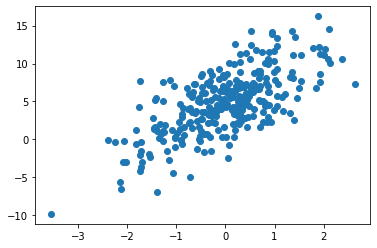

In [135]:
plt.scatter(x_train, y_train)

In [136]:
class NN(torch.nn.Module):
    def __init__(self, inputSize, hiddenSize, outputSize):
        super(NN, self).__init__()
        self.linear = nn.Sequential(torch.nn.Linear(inputSize, hiddenSize),
                                    torch.nn.ReLU(),
                                    torch.nn.Linear(hiddenSize, outputSize))
                                    

    def forward(self, x):
        out = self.linear(x)
        return out

In [137]:
inputDim = 1
hidden_sizes = 100
outputDim = 1      
learningRate = 0.001 
epochs = 101



In [138]:
criterion = torch.nn.MSELoss() 

In [139]:
#!!! Note that training in the code below done outside of epoch loop.
hs = []
train_losses = []
test_losses = []
for h in range(2, hidden_sizes, 1):
    hs.append(h)
    model = NN(inputDim, h, outputDim)
    optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)
    for epoch in range(epochs):
        if torch.cuda.is_available():
            inputs_train = Variable(torch.from_numpy(x_train).cuda())
            labels_train = Variable(torch.from_numpy(y_train).cuda())
        else:
            inputs_train = Variable(torch.from_numpy(x_train))
            labels_train = Variable(torch.from_numpy(y_train))
        if torch.cuda.is_available():
            inputs_test = Variable(torch.from_numpy(x_test).cuda())
            labels_test = Variable(torch.from_numpy(y_test).cuda())
        else:
            inputs_test = Variable(torch.from_numpy(x_test))
            labels_test = Variable(torch.from_numpy(y_test))
        optimizer.zero_grad()
        outputs = model(inputs_train)
        loss = criterion(outputs, labels_train)
        loss.backward()
        optimizer.step()
        if epoch % 50 == 0:
            print('h: {} | epoch: {}, loss: {}'.format(h, epoch, loss.item()))  
    outputs_train = model(inputs_train)
    train_loss = criterion(outputs_train, labels_train)
    train_losses.append(train_loss)
    outputs_test = model(inputs_test)
    test_loss = criterion(outputs_test, labels_test)
    test_losses.append(test_loss)

h: 2 | epoch: 0, loss: 47.97994613647461
h: 2 | epoch: 50, loss: 36.42958068847656
h: 2 | epoch: 100, loss: 29.839153289794922
h: 3 | epoch: 0, loss: 41.73468780517578
h: 3 | epoch: 50, loss: 37.10491943359375
h: 3 | epoch: 100, loss: 33.37312698364258
h: 4 | epoch: 0, loss: 43.244285583496094
h: 4 | epoch: 50, loss: 33.60681915283203
h: 4 | epoch: 100, loss: 26.314311981201172
h: 5 | epoch: 0, loss: 41.54965591430664
h: 5 | epoch: 50, loss: 34.64144515991211
h: 5 | epoch: 100, loss: 29.37396812438965
h: 6 | epoch: 0, loss: 39.5374870300293
h: 6 | epoch: 50, loss: 34.029701232910156
h: 6 | epoch: 100, loss: 29.035676956176758
h: 7 | epoch: 0, loss: 44.18269348144531
h: 7 | epoch: 50, loss: 32.992942810058594
h: 7 | epoch: 100, loss: 23.491531372070312
h: 8 | epoch: 0, loss: 38.676612854003906
h: 8 | epoch: 50, loss: 27.640296936035156
h: 8 | epoch: 100, loss: 17.901405334472656
h: 9 | epoch: 0, loss: 41.32894515991211
h: 9 | epoch: 50, loss: 29.749860763549805
h: 9 | epoch: 100, loss: 

h: 65 | epoch: 0, loss: 39.134037017822266
h: 65 | epoch: 50, loss: 16.65413475036621
h: 65 | epoch: 100, loss: 11.062702178955078
h: 66 | epoch: 0, loss: 36.515235900878906
h: 66 | epoch: 50, loss: 14.964420318603516
h: 66 | epoch: 100, loss: 10.57886791229248
h: 67 | epoch: 0, loss: 46.09262466430664
h: 67 | epoch: 50, loss: 11.951449394226074
h: 67 | epoch: 100, loss: 9.762673377990723
h: 68 | epoch: 0, loss: 42.47721862792969
h: 68 | epoch: 50, loss: 16.012086868286133
h: 68 | epoch: 100, loss: 10.820937156677246
h: 69 | epoch: 0, loss: 44.031070709228516
h: 69 | epoch: 50, loss: 12.701947212219238
h: 69 | epoch: 100, loss: 9.971864700317383
h: 70 | epoch: 0, loss: 39.085548400878906
h: 70 | epoch: 50, loss: 12.353391647338867
h: 70 | epoch: 100, loss: 10.011338233947754
h: 71 | epoch: 0, loss: 34.16343307495117
h: 71 | epoch: 50, loss: 13.210046768188477
h: 71 | epoch: 100, loss: 10.259469985961914
h: 72 | epoch: 0, loss: 43.51414489746094
h: 72 | epoch: 50, loss: 12.6891622543334

In [140]:
with torch.no_grad(): 
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

[[ 2.9006534e+00]
 [ 2.9623680e+00]
 [ 2.2653108e+00]
 [ 5.4249434e+00]
 [ 7.1322594e+00]
 [ 4.4535522e+00]
 [ 2.0896902e+00]
 [ 4.9769363e+00]
 [ 3.2823186e+00]
 [ 4.0383782e+00]
 [ 2.0028358e+00]
 [ 5.0900412e+00]
 [ 3.6330833e+00]
 [ 4.9600267e+00]
 [ 3.4994612e+00]
 [ 4.2280502e+00]
 [ 4.2464771e+00]
 [ 5.3273840e+00]
 [ 4.6920352e+00]
 [ 3.4501972e+00]
 [ 2.3677659e+00]
 [ 2.6193342e+00]
 [ 3.8543415e+00]
 [ 7.3447051e+00]
 [ 7.3085194e+00]
 [ 4.2216454e+00]
 [ 5.0245533e+00]
 [ 5.6875110e+00]
 [ 6.4152803e+00]
 [ 1.8008193e+00]
 [ 8.3844061e+00]
 [ 4.8120699e+00]
 [ 2.7940822e+00]
 [ 4.4725890e+00]
 [ 3.6310053e+00]
 [ 6.2215347e+00]
 [ 5.5641427e+00]
 [ 5.1998301e+00]
 [ 2.7717299e+00]
 [ 3.9069648e+00]
 [ 4.3579435e+00]
 [ 1.9605843e+00]
 [ 1.0132397e+01]
 [ 1.0793777e+01]
 [ 5.3149328e+00]
 [ 3.0241342e+00]
 [ 8.2965946e+00]
 [ 3.6335125e+00]
 [ 6.5094643e+00]
 [ 8.3771858e+00]
 [ 4.1126747e+00]
 [ 6.5067635e+00]
 [ 1.1831400e+00]
 [ 7.7357845e+00]
 [ 8.4059324e+00]
 [ 1.83152

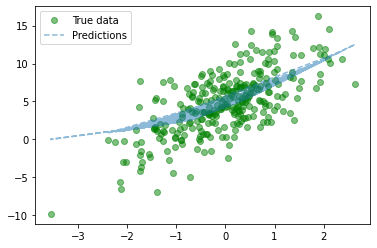

In [141]:
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

### Interpolation threshold.
Plot the interpolation threshold (n=p) as a vertical line.
The number of parameters is $p = (d+1)*H + (H+1)*K$, where H is a number of neurons in a hidden layer;
d is a dimension of input and K is a dimension of output (K=1 in the case of regression).
The X-axis on the plot below reveals the size of H.
1. What will be the value of H for the case n=p?
2. Plot the interpolation threshold. Does it correspond to a test loss pick?

(0.0, 100.0)

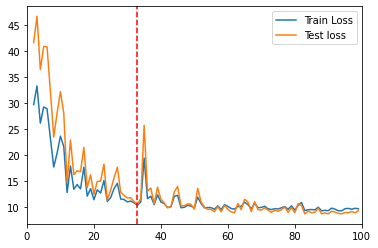

In [145]:
plt.plot(hs, train_losses, label='Train Loss')
plt.plot(hs, test_losses, label='Test loss')
plt.legend(loc='best')
plt.axvline(33, color = 'r', linestyle = '--')
plt.xlim(0, 100)

(0.0, 100.0)

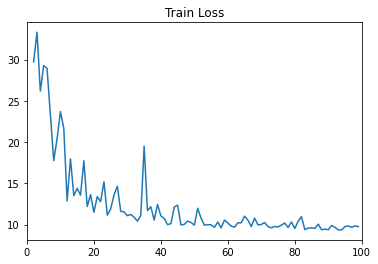

In [143]:
plt.plot(hs, train_losses)
plt.title('Train Loss')
plt.xlim(0, 100)

(0.0, 100.0)

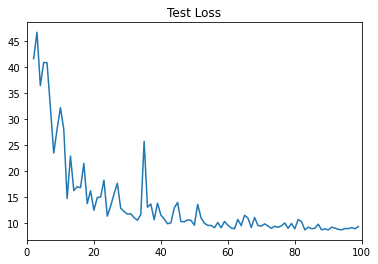

In [144]:
plt.plot(hs, test_losses)
plt.title('Test Loss')
plt.xlim(0, 100)